In [70]:
import os
import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
from libs.utils import filter_glucose_by_range, filter_noisy_data

In [71]:
data_root = "/mnt/data2/mtseng/dataset/SeNSE/TCH_processed/beat"
out_root = "/mnt/data2/mtseng/dataset/SeNSE/data_analysis/glucose"
subject_id = 'c2s05'

In [72]:
df = pd.read_pickle(os.path.join(data_root, '{}.pkl'.format(subject_id)))
print(df.head())
print(df.shape)

                                                Time  \
0  [2022-11-28T10:33:07.623000000, 2022-11-28T10:...   
1  [2022-11-28T10:33:08.443000000, 2022-11-28T10:...   
2  [2022-11-28T10:33:09.383000000, 2022-11-28T10:...   
3  [2022-11-28T10:33:10.323000000, 2022-11-28T10:...   
4  [2022-11-28T10:33:11.259000000, 2022-11-28T10:...   

                                         EcgWaveform  \
0  [3139, 3129, 3119, 3111, 3107, 3104, 3104, 310...   
1  [1705, 1703, 1700, 1698, 1696, 1694, 1692, 168...   
2  [1872, 1872, 1874, 1875, 1876, 1876, 1877, 187...   
3  [1936, 1937, 1939, 1941, 1944, 1945, 1946, 194...   
4  [1933, 1933, 1933, 1935, 1936, 1938, 1940, 194...   

                                                  HR  glucose  CGM_idx  \
0  [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...    114.0  20671.0   
1  [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...    114.0  20671.0   
2  [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...    114.0  20671.0   
3  [60, 60, 60, 60, 60, 60, 60

In [73]:
df_glucose = filter_glucose_by_range(df)
df_glucose = df_glucose.drop_duplicates(subset='Timestamp', keep='first')
print(df_glucose)

Glucose Level Filtering (remove beats with glucose value outside 40-180 mg/dl ):
 - Original count:  1231148
 - Filtered count:  1172693
 - Availability ratio: 0.953
                                                      Time  \
0        [2022-11-28T10:33:07.623000000, 2022-11-28T10:...   
81       [2022-11-28T10:34:27.035000000, 2022-11-28T10:...   
387      [2022-11-28T10:39:26.475000000, 2022-11-28T10:...   
698      [2022-11-28T10:44:26.367000000, 2022-11-28T10:...   
1000     [2022-11-28T10:49:26.251000000, 2022-11-28T10:...   
...                                                    ...   
1229906  [2022-12-13T08:55:06.073000000, 2022-12-13T08:...   
1230154  [2022-12-13T09:00:06.217000000, 2022-12-13T09:...   
1230402  [2022-12-13T09:05:07.081000000, 2022-12-13T09:...   
1230649  [2022-12-13T09:10:06.477000000, 2022-12-13T09:...   
1230895  [2022-12-13T09:15:06.225000000, 2022-12-13T09:...   

                                               EcgWaveform  \
0        [3139, 3129, 3119,

In [74]:
# average glucose in hg
average_glucose_in_hg = df_glucose[df_glucose['glucose'] < 70]['glucose'].mean()
print('Average glucose in hg: {:.2f}'.format(average_glucose_in_hg))
average_glucose_in_eg = df_glucose[df_glucose['glucose'] >= 70]['glucose'].mean()
print('Average glucose in eg: {:.2f}'.format(average_glucose_in_eg))
num_glucose_in_hg = df_glucose[df_glucose['glucose'] < 70].shape[0]
num_glucose_in_eg = df_glucose[df_glucose['glucose'] >= 70].shape[0]
print('#hg/(#hg+#eg): {:.4f}'.format(num_glucose_in_hg / (num_glucose_in_hg + num_glucose_in_eg)))

# Hypoglycemic readings at night (12-7am)
nocturnal_hg = df_glucose[(df_glucose['Timestamp'].dt.hour >= 0) & (df_glucose['Timestamp'].dt.hour < 7)]
num_nocturnal_glucose_in_hg = nocturnal_hg[nocturnal_hg['glucose'] < 70].shape[0]
print('#nocturnal hg/#hg: {:.4f}'.format(num_nocturnal_glucose_in_hg / num_glucose_in_hg))


Average glucose in hg: 62.49
Average glucose in eg: 108.33
#hg/(#hg+#eg): 0.0720
#nocturnal hg/#hg: 0.3828


#### Clean Signal

In [75]:
clean_df = filter_glucose_by_range(df)
clean_df = filter_noisy_data(clean_df)
print(clean_df)

Glucose Level Filtering (remove beats with glucose value outside 40-180 mg/dl ):
 - Original count:  1231148
 - Filtered count:  1172693
 - Availability ratio: 0.953
Filter out noisy data (HRConfidence < 100 or ECGNoise >= 0.001):
 - Original:  1172693
 - Filtered:  882460
 - Availability Ratio: 0.753
                                                      Time  \
57       [2022-11-28T10:34:00.991000000, 2022-11-28T10:...   
58       [2022-11-28T10:34:02.043000000, 2022-11-28T10:...   
59       [2022-11-28T10:34:03.015000000, 2022-11-28T10:...   
60       [2022-11-28T10:34:03.939000000, 2022-11-28T10:...   
61       [2022-11-28T10:34:04.883000000, 2022-11-28T10:...   
...                                                    ...   
1213818  [2022-12-13T02:25:25.370000000, 2022-12-13T02:...   
1213819  [2022-12-13T02:25:26.430000000, 2022-12-13T02:...   
1213820  [2022-12-13T02:25:27.498000000, 2022-12-13T02:...   
1213821  [2022-12-13T02:25:28.574000000, 2022-12-13T02:...   
1213822  [2022-

In [76]:
df_glucose_clean = clean_df.drop_duplicates(subset='Timestamp', keep='first')
print(df_glucose_clean)

                                                      Time  \
57       [2022-11-28T10:34:00.991000000, 2022-11-28T10:...   
81       [2022-11-28T10:34:27.035000000, 2022-11-28T10:...   
387      [2022-11-28T10:39:26.475000000, 2022-11-28T10:...   
698      [2022-11-28T10:44:26.367000000, 2022-11-28T10:...   
1000     [2022-11-28T10:49:26.251000000, 2022-11-28T10:...   
...                                                    ...   
1211823  [2022-12-13T01:51:04.142000000, 2022-12-13T01:...   
1212059  [2022-12-13T01:55:04.014000000, 2022-12-13T01:...   
1213382  [2022-12-13T02:17:54.986000000, 2022-12-13T02:...   
1213604  [2022-12-13T02:21:48.106000000, 2022-12-13T02:...   
1213814  [2022-12-13T02:25:21.118000000, 2022-12-13T02:...   

                                               EcgWaveform  \
57       [2041, 2041, 2042, 2042, 2042, 2041, 2041, 204...   
81       [2027, 2028, 2028, 2028, 2029, 2029, 2030, 202...   
387      [2025, 2024, 2024, 2025, 2026, 2027, 2028, 202...   
698    

#### Plot the glucose

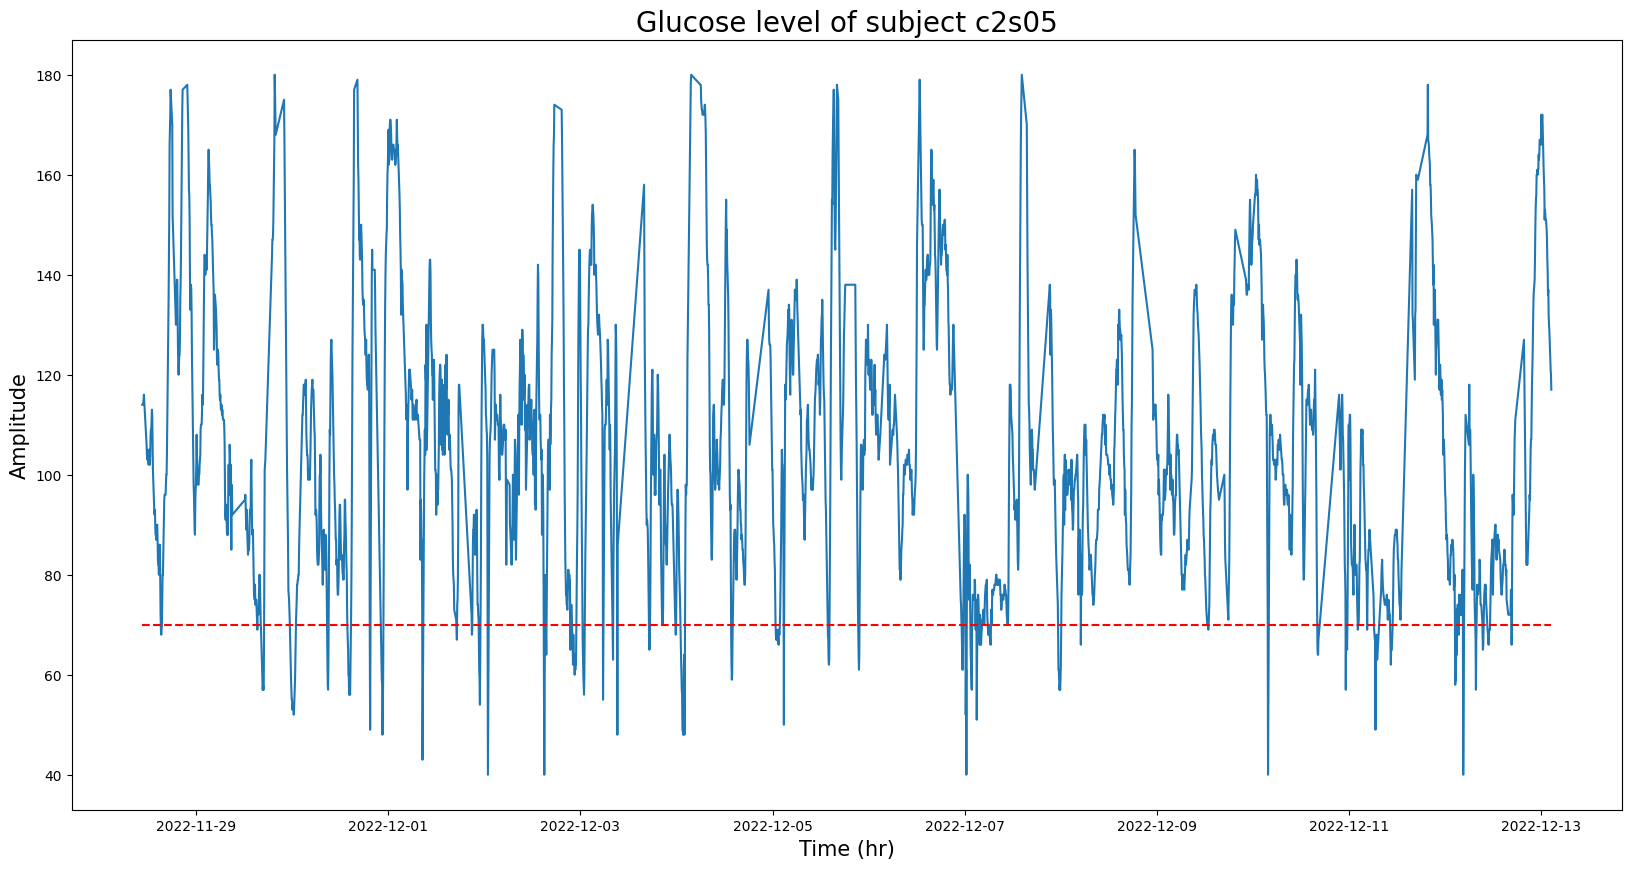

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(df_glucose_clean['Timestamp'], df_glucose_clean['glucose'])
ax.hlines(y=70, xmin=df_glucose_clean['Timestamp'].iloc[0], xmax=df_glucose_clean['Timestamp'].iloc[-1], colors='r', linestyles='dashed')
ax.set_xlabel('Time (hr)', fontsize=15)
# set the xticks to be every 5 minutes
ax.set_ylabel('Amplitude', fontsize=15)
ax.set_title('Glucose level of subject {}'.format(subject_id), fontsize=20)
fig.show()

In [78]:
## Save the clean data
os.makedirs(out_root, exist_ok=True)
out_df = df_glucose_clean[['Timestamp', 'glucose']]
out_path = os.path.join(out_root, '{}.csv'.format(subject_id))
out_df.to_csv(out_path, index=False)
print('Save into {}'.format(out_path))

Save into /mnt/data2/mtseng/dataset/SeNSE/data_analysis/glucose/c2s05.csv
